<a href="https://colab.research.google.com/github/josegab1515/Desafios-Jacto/blob/main/Desafio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import os
import glob

uploaded = files.upload()
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
  zip_ref.extractall("cars_dataset")

csv_file = glob.glob("cars_dataset/*.csv")
cars_csv = csv_file[0]

df_cars = pd.read_csv(cars_csv, low_memory=False)

Saving CarsData.csv.zip to CarsData.csv.zip


In [4]:
print(df_cars.shape)
print(df_cars.columns)
df_cars.head()
df_cars.info()

(97712, 10)
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


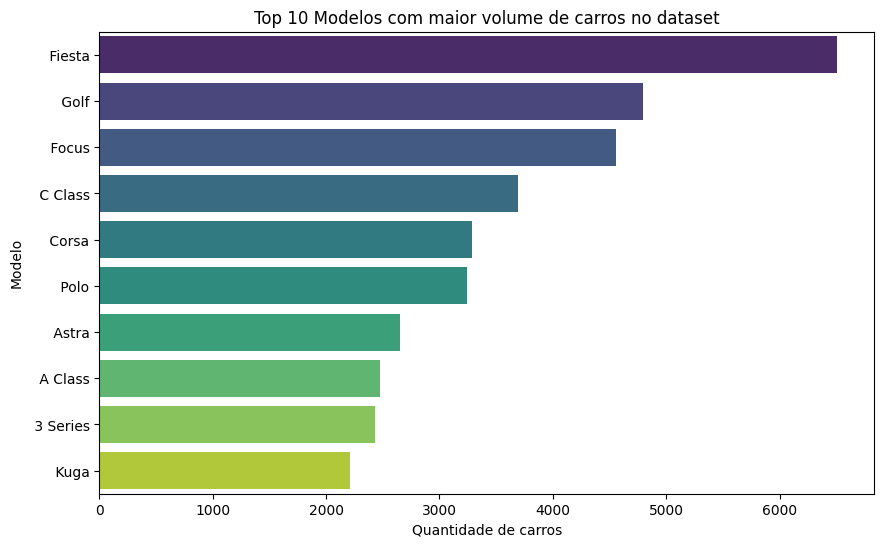

In [5]:
volume_marcas = df_cars['model'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=volume_marcas.values, y=volume_marcas.index, hue=volume_marcas.index, palette="viridis")
plt.title("Top 10 Modelos com maior volume de carros no dataset")
plt.xlabel("Quantidade de carros")
plt.ylabel("Modelo")
plt.show()

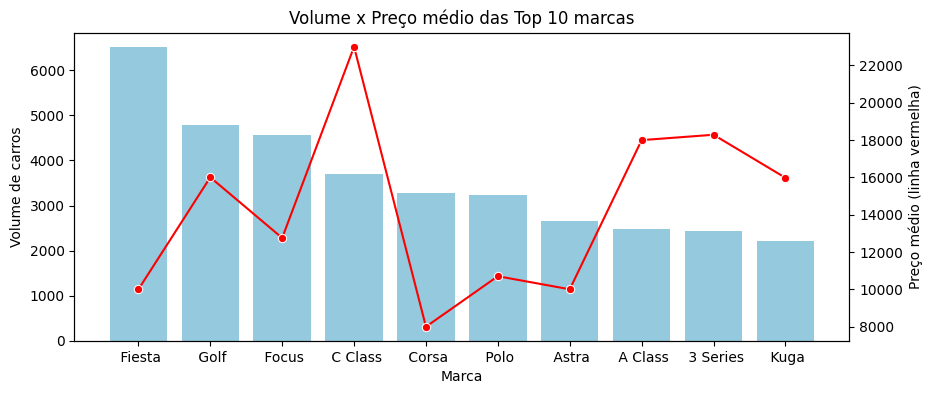

In [ ]:
analise = df_cars.groupby("model").agg(
    preco_medio=("price", "median"),
    volume=("model", "count")
).reset_index()

top_marcas = analise.sort_values(by="volume", ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10,4))

sns.barplot(data=top_marcas, x="model", y="volume", color="skyblue", ax=ax1)
ax1.set_ylabel("Volume de carros")
ax1.set_xlabel("Marca")
ax1.set_title("Volume x Preço médio das Top 10 marcas")
ax2 = ax1.twinx()
sns.lineplot(data=top_marcas, x="model", y="preco_medio", color="red", marker="o", ax=ax2)
ax2.set_ylabel("Preço médio (linha vermelha)")

plt.show()
